In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import fiona
import geopandas as gpd
import pysal as ps
#from pysal.contrib.viz import mapping as maps
import shapefile
import pandas as pd
from shapely.geometry import shape
import numpy as np
import matplotlib

In [2]:
myshp = open("../data/CA_2020_Census_Tracts/tl_2020_06_tract.shp","rb")
mydbf = open("../data/CA_2020_Census_Tracts/tl_2020_06_tract.dbf", "rb")
myprj = open("../data/CA_2020_Census_Tracts/tl_2020_06_tract.prj", "rb")

In [3]:
r = shapefile.Reader(shp=myshp, dbf=mydbf, prj=myprj)
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
for row in r.shapeRecords():  
    geometry.append(shape(row.shape.__geo_interface__))  
    attributes.append(dict(zip(field_names, row.record)))  

In [4]:
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry)

In [5]:
gdf['fips'] = gdf['STATEFP'] + gdf['COUNTYFP'] + gdf['TRACTCE']

In [6]:
gdf['fips'] = gdf['fips'].astype(int)
gdf['GEOID'] = gdf['GEOID'].astype(int)
gdf['tot'] = 0

In [35]:
df000 = pd.read_csv("../build/bin/CA.csv", header=None, names=["fips", "tot"], dtype={'fips':int, 'tot':float})

In [36]:
gdf000 = gdf.merge(df000, left_on='fips', right_on='fips', how='left')

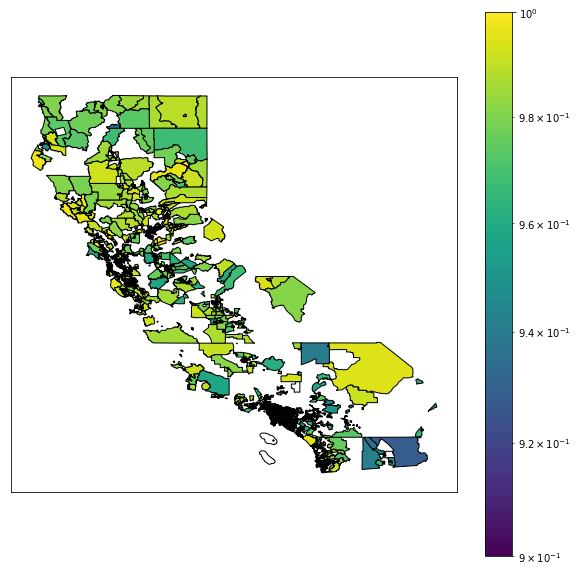

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(aspect='equal', xticks=[], yticks=[])
#gdf000.plot(column= 'tot_x', ax = ax, cmap='Purples', edgecolor="black", linewidth=0.2, legend=False, vmin=0, vmax=50000)
gdf000.plot(column= 'tot_y', ax = ax, legend=True, edgecolor="black", norm=matplotlib.colors.LogNorm(vmin=0.9, vmax=1.0))
#gdf000.plot(column= 'tot_x', ax = ax, cmap='Purples')
fig.savefig("CA")